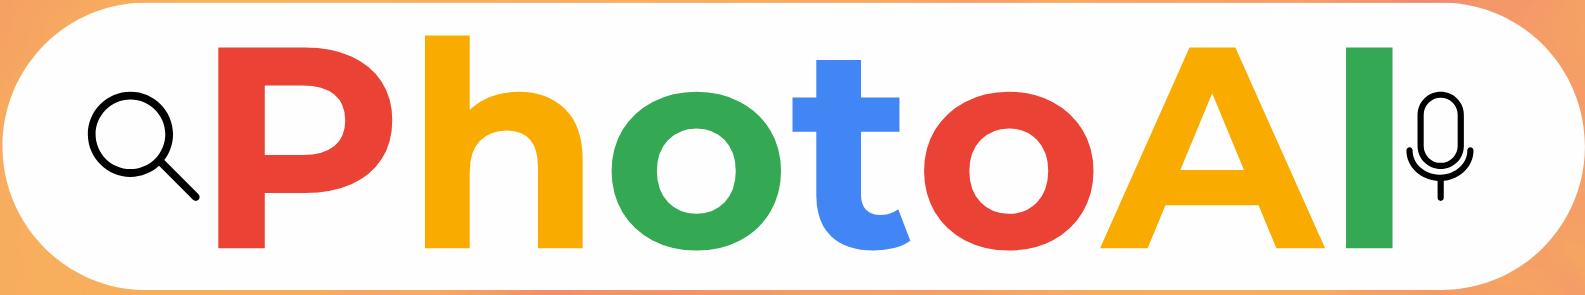

Welcome to **PhotoAI**! Hosted by the **Google Developers Student Club** at the University of Toronto Scarborough, this event will introduce you to the power of Hugging Face models and Generative AI. Discover how you can easily create innovative products by harnessing these tools to bring your ideas to life, no matter your experience level.

And don’t miss **DevFest**, happening on **November 23rd at UTSC**! Join us for the largest tech conference in campus history—an incredible opportunity to connect, learn, and explore the latest in tech innovation with like-minded enthusiasts. We can’t wait to see you there!

# Image-to-image

In [41]:
import torch
from PIL import Image, ImageOps
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler
from transformers import BlipProcessor, BlipForConditionalGeneration

```StableDiffusionInstructPix2PixPipeline``` -> This is a pipeline for the model ***InstructPix2Pix*** which takes an image and modifies it based on a specified prompt

In [8]:
# load model
model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

model_index.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


loads and edits the image as needed

In [11]:
file_path = "/kaggle/input/photo1/photo.jpg"

def load_image(file_path_, max_size=(512, 512)):
    img = Image.open(file_path_)
    img = ImageOps.exif_transpose(img)
    img = img.convert("RGB")
    img.thumbnail(max_size)
    return img

image = load_image(file_path)

Promps for human / or clearly identifiable subjects

In [12]:
#prompt = "Modify subject into a western style character"
#prompt = "Modify the subject to resemble a gigachad, strong jawline, defined cheekbones, ensure he remains recognizable. Keep the background unchanged and the overall expression natural."
#prompt = "Modify subject as a disney movie character style, large expressive eyes, whimsical smile, preserve the original face shape, preserve clothes"
#prompt = "Modify the subject to resemble a comic book character, preserve face shape, preserve background"
#prompt = "as a comic"
#prompt = "Modify the subject to resemble an anime style character, preserve face shape"
#prompt = "as an anime"
prompt = "as an astronaut"

Prompts for general picture style / Non human photos

In [ ]:
#prompt = "make the subject a cartoon like character"
#prompt = "add red flowers in the background"
#prompt = "make the subject a dark brown, keep mouth and toungue unchanged"
#prompt = "make the picture a van gogh style painting"
#prompt = "as a basquiat style painting"
#prompt = "as an anime"

negative prompt

In [13]:
neg = "distortions, unrecognizable features unnatural characteristics, bad anatomy, subject not recognizable"

In [15]:
images = pipe(prompt, negative_prompt=neg, image=image, num_inference_steps=25, guidance_scale=5.5, image_guidance_scale=1.5).images
output_path = "/kaggle/working/output_image2.jpg"
images[0].save(output_path)

  0%|          | 0/25 [00:00<?, ?it/s]


```prompt``` -> the prompt that gives instructions to the model

```negative_prompt = neg``` -> negative prompt specified with undesired characteristics in the resulting image

```image = image``` -> image we want to modify

```num_inference_steps = 25``` -> number of **denoising steps** (changes the quality of the output image - the more steps lead to higher quality)

```guidance_scale = 5.5``` -> how closely followed the prompt we specified will be (higher value = prompt will be followed more closely, lower value = model has more "freedom")

```image_guidance_scale= 1.5``` -> How similar should de output image be to teh original image (higher values lead to more similar outputs)


# Combining Multiple Models

## Image to Text + Text to Image

In [17]:
# import PIL
import torch
from PIL import Image, ImageOps
from transformers import BlipProcessor, BlipForConditionalGeneration
from diffusers import StableDiffusionPipeline

models

https://huggingface.co/Salesforce/blip-image-captioning-base

https://huggingface.co/stable-diffusion-v1-5/stable-diffusion-v1-5

In [18]:
image_to_text_model = "Salesforce/blip-image-captioning-base"
text_to_image_model = "runwayml/stable-diffusion-v1-5"

- `BlipProcessor` prepares images for the model

- `BlipForConditionalGeneration` generates text descriptions for images

- `.to("mps")` moves the model to the Apple Metal Performance Shaders (MPS) device for GPU acceleration on macOS
- can use "cuda" alternatively on PC

In [20]:
processor = BlipProcessor.from_pretrained(image_to_text_model)
blip_model = BlipForConditionalGeneration.from_pretrained(image_to_text_model)
blip_model.to("cuda")

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

In [21]:
# load text to image model
pipe = StableDiffusionPipeline.from_pretrained(text_to_image_model, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

load image (right side up and at most of size 512x512)

In [23]:
file_path = "/kaggle/input/photo1/photo.jpg"

def load_image(file_path_, max_size=(512, 512)):
    img = Image.open(file_path_)
    img = ImageOps.exif_transpose(img)
    img = img.convert("RGB")
    img.thumbnail(max_size)
    return img

image = load_image(file_path)

- prepare image for blip model by converting it into a pytorch tensor format

- `blip_model.generate` generates image caption

  - `num_beams` controls the number of beams used for beam search, a decoding strategy to improve output quality

- `processor.decode` decodes the generated output to a human-readable string

In [24]:
# getting description from img
inputs = processor(image, return_tensors="pt").to("cuda")
outputs = blip_model.generate(**inputs,num_beams=20)
description = processor.decode(outputs[0], skip_special_tokens=True)

print(f"Description: {description}")

/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1220: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Description: a young man wearing glasses and a black t - shirt


- `num_inference_steps=25` controls number of steps in the diffusion process (higher values may improve quality but increase processing time)

- `image_guidance_scale=1` determines how much the description should influence the final output (higher values make the output more closely match the description)

In [25]:
modified_description = f"A Disney-style portrait of {description} with large, expressive eyes and a whimsical smile."

# new image from modified description
generated_image = pipe(modified_description, num_inference_steps=25, guidance_scale=20).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

In [27]:
output_path = "/kaggle/working/output_imagev2.jpg"
generated_image.save(output_path)

## Image to Text + Image to Image

In [28]:
# import PIL
import torch
from PIL import Image, ImageOps
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler
from transformers import BlipProcessor, BlipForConditionalGeneration

models

https://huggingface.co/Salesforce/blip-image-captioning-base

https://huggingface.co/timbrooks/instruct-pix2pix

In [29]:
image_to_text_model = "Salesforce/blip-image-captioning-base"
image_to_image_model = "timbrooks/instruct-pix2pix"

- `BlipProcessor` prepares images for the model

- `BlipForConditionalGeneration` generates text descriptions for images

- `.to("cpu")` moves the model to cpu

- can use `"mps"` for GPU acceleration on macOS
- can use `"cuda"` alternatively on PC

In [30]:
# load image to text model
processor = BlipProcessor.from_pretrained(image_to_text_model)
blip_model = BlipForConditionalGeneration.from_pretrained(image_to_text_model)
blip_model.to("cuda")

BlipForConditionalGeneration(
  (vision_model): BlipVisionModel(
    (embeddings): BlipVisionEmbeddings(
      (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (encoder): BlipEncoder(
      (layers): ModuleList(
        (0-11): 12 x BlipEncoderLayer(
          (self_attn): BlipAttention(
            (dropout): Dropout(p=0.0, inplace=False)
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (projection): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): BlipMLP(
            (activation_fn): GELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
      )
    )
    (post_layernorm): LayerNorm((768,), eps=1e-0

`EulerAncestralDiscreteScheduler`: A scheduler is used to guide the image generation process by determining how noise is added and removed during the diffusion steps

Starts with a noisy, random image and gradually reduces the noise step by step

As the noise is removed, model refines image based on prompt

In [31]:
# load text to image model
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(image_to_image_model, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

load image (right side up and at most of size 512x512)

In [32]:
file_path = "/kaggle/input/photo1/photo.jpg"

def load_image(file_path_, max_size=(512, 512)):
    img = Image.open(file_path_)
    img = ImageOps.exif_transpose(img)
    img = img.convert("RGB")
    img.thumbnail(max_size)
    return img

image = load_image(file_path)

- prepare image for blip model by converting it into a pytorch tensor format

- `blip_model.generate` generates image caption

  - `num_beams` controls the number of beams used for beam search, a decoding strategy to improve output quality

- `processor.decode` decodes the generated output to a human-readable string

In [34]:
 # getting description from image
inputs = processor(image, return_tensors="pt").to("cuda")
outputs = blip_model.generate(**inputs, num_beams=20)
description = processor.decode(outputs[0], skip_special_tokens=True)

print(f"Description: {description}")

Description: a young man wearing glasses and a black t - shirt


- `num_inference_steps=25` controls number of steps in the diffusion process (higher values may improve quality but increase processing time)

- `image_guidance_scale=1` determines how much the original image should influence the final output (lower values rely more on the original)

In [35]:
modified_description = f"Create a Disney-style portrait of {description} with large, expressive eyes and a whimsical smile."

# new image from modified description
images = pipe(modified_description, image=image, num_inference_steps=25, image_guidance_scale=1).images

  0%|          | 0/25 [00:00<?, ?it/s]

In [37]:
output_path = "/kaggle/working/output_image.jpg"
images[0].save(output_path)

# Inpainting

In [39]:
import torch
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid

# Load the inpainting model with half-precision for efficiency
pipeline = AutoPipelineForInpainting.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder-inpaint", torch_dtype=torch.float16
)

# Load the base image and mask (white pixels define areas to modify)
init_image = load_image("inpaint.png")
mask_image = load_image("inpaint_mask.png")

# Offload model layers to CPU when not in use to save memory
pipeline.enable_model_cpu_offload()

# Set up random generator for reproducible results
generator = torch.Generator("cuda").manual_seed(92)

# Run the inpainting model with the given prompt
prompt = "concept art digital painting of an elven castle, inspired by lord of the rings, highly detailed, 8k"
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image).images[0]

# Display the resulting image in a grid
make_image_grid([image], rows=1, cols=1)


model_index.json:   0%|          | 0.00/257 [00:00<?, ?B/s]

Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

unet/config.json:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.72k [00:00<?, ?B/s]

movq/config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/318 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/271M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.01G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

model_index.json:   0%|          | 0.00/501 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

image_encoder/config.json:   0%|          | 0.00/2.01k [00:00<?, ?B/s]

image_processor/preprocessor_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.69G [00:00<?, ?B/s]

prior/config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/4.10G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

ValueError: Incorrect path or URL. URLs must start with `http://` or `https://`, and inpaint.png is not a valid path.

1. **Model Selection and Loading:**
`AutoPipelineForInpainting` loads a pre-trained inpainting model. In this case, it’s the `Kandinsky-2-2 Decoder` model, suitable for creating detailed, AI-assisted modifications to images.
Setting `torch_dtype` to `torch.float16` helps optimize memory usage by loading the model in half-precision.
2. **Image and Mask Preparation:**
`init_image` is the original image we want to inpaint or modify, and `mask_image` is the guide mask image. Areas marked in white in the mask image are eligible for modification based on the prompt.

3. **Generator for Reproducibility:**
By using `torch.Generator` with a fixed seed, we ensure that every run with the same seed produces identical results

4. **Running the Inpainting Process:**
The pipeline generates an output image based on the input prompt and the provided mask, blending the prompt’s style into the inpainted areas of init_image.

5. **Image Display:**
make_image_grid creates a grid layout to visualize the output image(s). Here it’s a 1x1 grid, displaying only the generated result.